In [2]:
import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd
df1=pd.read_csv('creditcard.csv')

In [3]:
df1.drop('Time',axis=1,inplace=True)
df1.drop('V1',axis=1,inplace=True)
df1.drop('V2',axis=1,inplace=True)
df1.drop('V3',axis=1,inplace=True)
df1.drop('V5',axis=1,inplace=True)
df1.drop('V6',axis=1,inplace=True)
df1.drop('V7',axis=1,inplace=True)
df1.drop('V8',axis=1,inplace=True)
df1.drop('V9',axis=1,inplace=True)
df1.drop('V10',axis=1,inplace=True)
df1.drop('V12',axis=1,inplace=True)
df1.drop('V13',axis=1,inplace=True)
df1.drop('V14',axis=1,inplace=True)
df1.drop('V15',axis=1,inplace=True)
df1.drop('V16',axis=1,inplace=True)
df1.drop('V17',axis=1,inplace=True)
df1.drop('V18',axis=1,inplace=True)
df1.drop('V22',axis=1,inplace=True)
df1.drop('V23',axis=1,inplace=True)
df1.drop('V24',axis=1,inplace=True)

In [4]:
df1.head(10)

,V4,V11,V19,V20,V21,V25,V26,V27,V28,Amount,Class
0,1.378155,-0.551600,0.403993,0.251412,-0.018307,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.448154,1.612727,-0.145783,-0.069083,-0.225775,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.379780,0.624501,-2.261857,0.524980,0.247998,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.863291,-0.226487,-1.232622,-0.208038,-0.108300,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.403034,-0.822843,0.803487,0.408542,-0.009431,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,-0.168252,1.341262,-0.033194,0.084968,-0.208254,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.202613,-1.416907,-0.045575,-0.219633,-0.167716,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,-0.492199,-0.619468,0.324505,-0.156742,1.943465,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,-0.271526,-0.705117,0.570328,0.052736,-0.073425,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,-0.222187,1.017614,0.451773,0.203711,-0.246914,-0.069733,0.094199,0.246219,0.083076,3.68,0


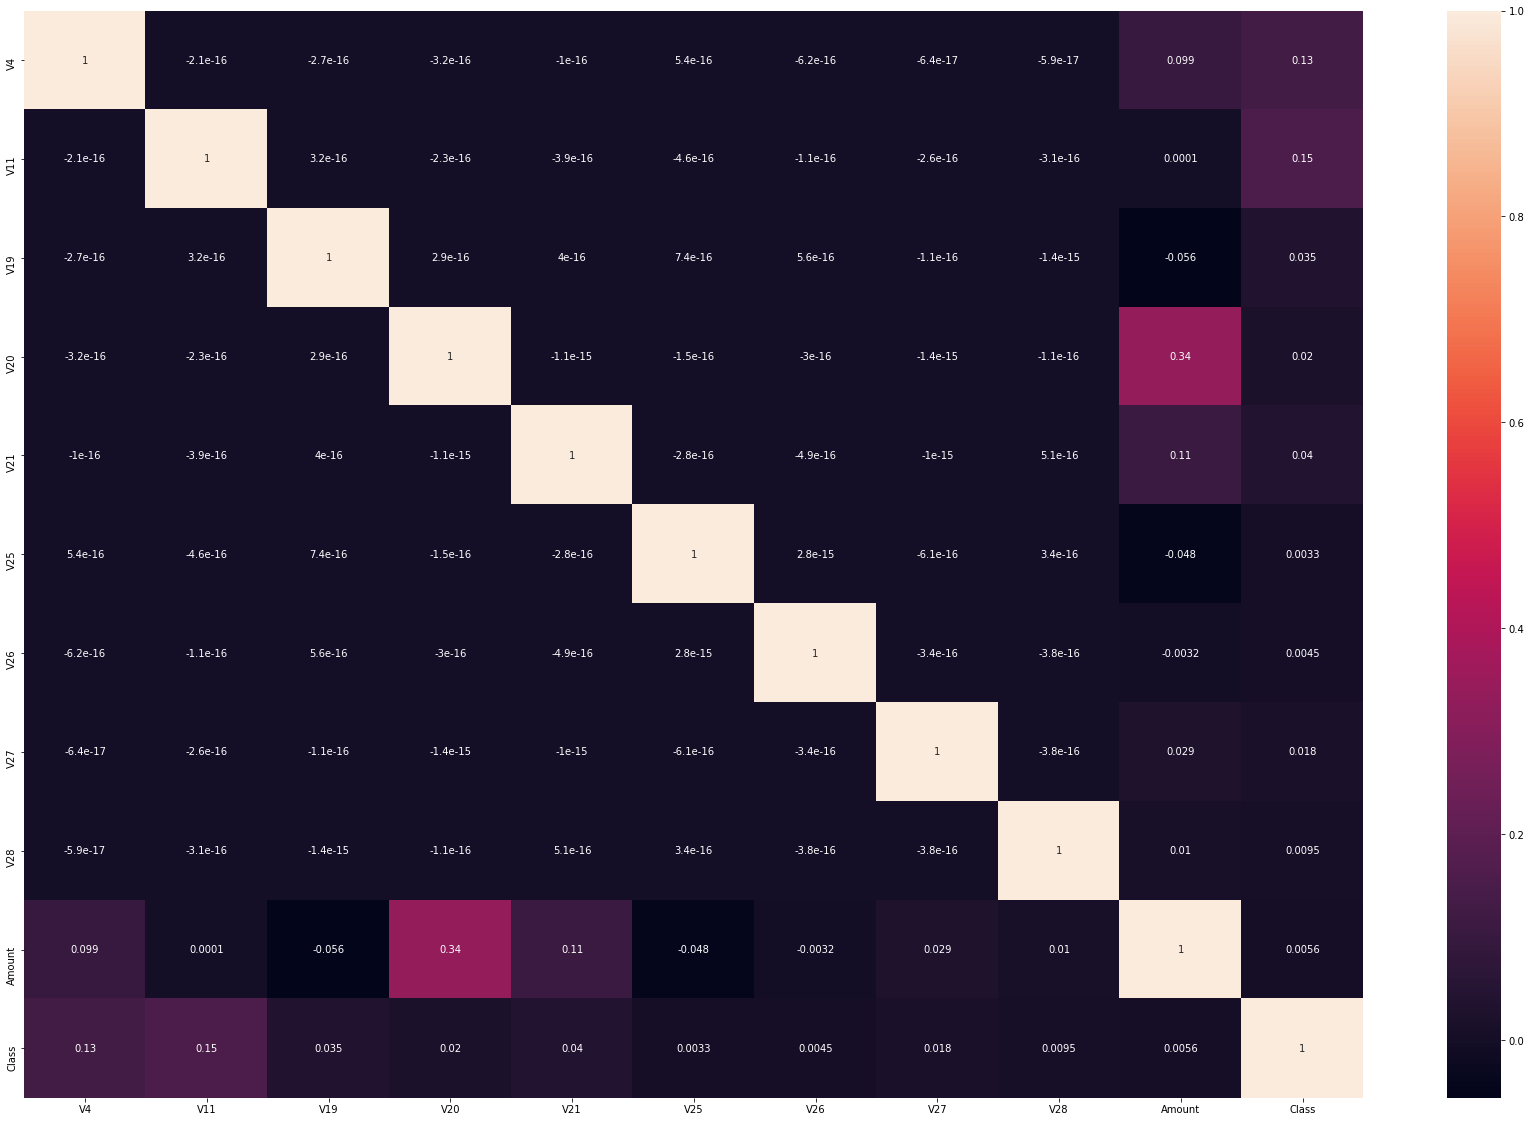

In [63]:
plt.pyplot.figure(figsize=(30, 20))
sns.heatmap(df1.corr(),annot=True)


/home/arnav/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/arnav/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/arnav/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/arnav/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


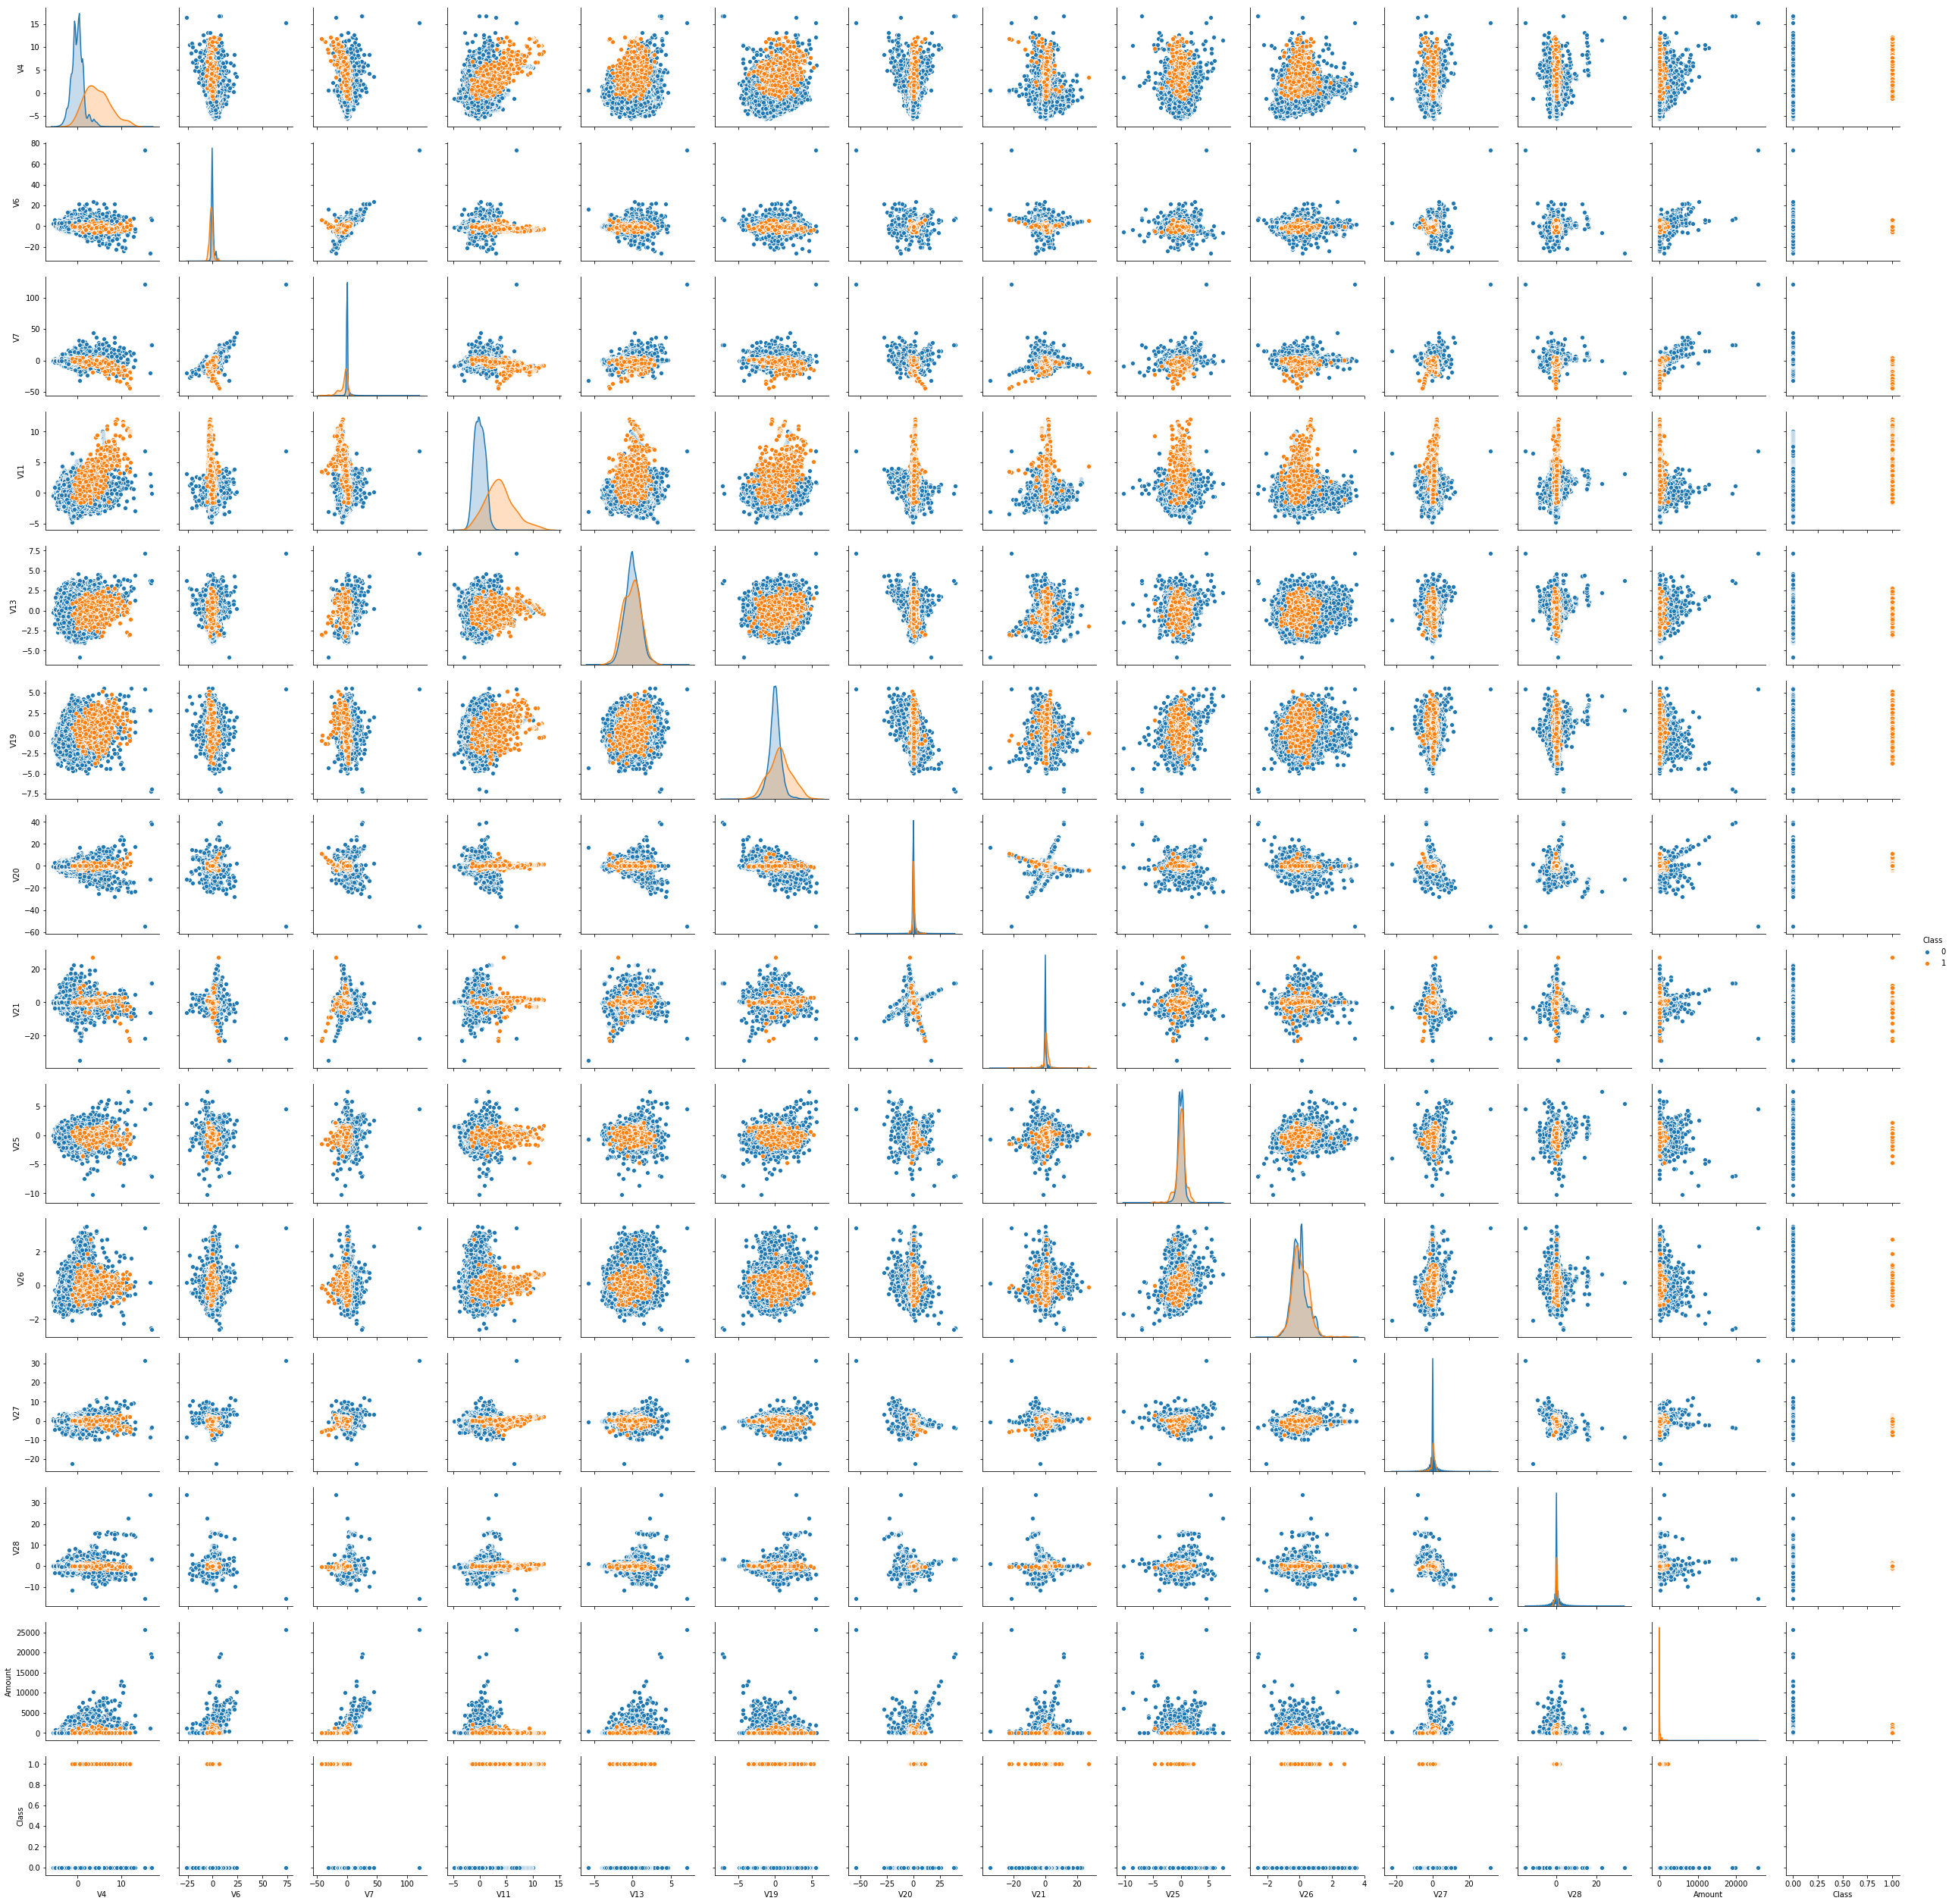

In [55]:
sns.pairplot(df1,hue='Class')

In [14]:
from sklearn.model_selection import train_test_split

X = df1.drop(['Class'], axis=1)
y = df1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1011)

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 

In [17]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(metrics.accuracy_score(y_pred, y_test) * 100)

99.91924440855307


In [19]:
print(confusion_matrix(y_test, y_pred))

[[85292     3]
 [   66    82]]


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.55      0.70       148

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.98      0.78      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [23]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

In [24]:
print(metrics.accuracy_score(y_pred, y_test) * 100)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [25]:
print(confusion_matrix(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [26]:
print(classification_report(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets